# Otimização por Múltiplos Enxames Aplicada ao Escalonamento Dinâmico de Projetos de Software


### QP3. Qual a influência de cada estratégia heurísitca dinâmica no desempenho do MS2MO?

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

from dspsp_analysis import (algorithm_dataset, instance_dataset, comparison_dataset, 
                            max_event, metrics_dataset, mean_hypervolume, median_hypervolume)

%matplotlib inline

data = metrics_dataset(filepath="../hypervolume/metrics-dynamic-strategy.csv")
instance_ids = list(data.instance.unique())
algorithm_ids = list(data.algorithm.unique())

In [19]:
instance_datasets = {}
for inst in instance_ids:
    ds = instance_dataset(data, inst, zero_values=True)
    instance_datasets[inst] = {alg: algorithm_dataset(ds, alg, zero_values=True) for alg in algorithm_ids}

In [20]:
comparison_datasets = {}
for inst in instance_ids:
    comparison_datasets[inst] = {alg: comparison_dataset(instance_datasets[inst][alg]) for alg in algorithm_ids}


In [23]:
for inst in instance_ids:
    min_event = min([max_event(ds) for ds in comparison_datasets[inst].values()])
    for k in comparison_datasets[inst].keys():
        comparison_datasets[inst][k] = comparison_datasets[inst][k][:min_event+1]
        

#### Gráficos comparativos

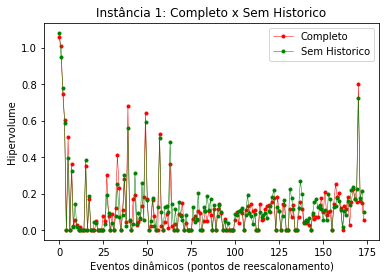

In [26]:
plt.title("Instância 1: Completo x Sem Historico")
plt.xlabel("Eventos dinâmicos (pontos de reescalonamento)")
plt.ylabel("Hipervolume")
plt.plot(comparison_datasets["ST10_DT10_E5_SK4-5"]["MS2MODynamic-complete"].event, comparison_datasets["ST10_DT10_E5_SK4-5"]["MS2MODynamic-complete"].hypervolume, "-ro", markersize=3, lw=.5, label="Completo")
plt.plot(comparison_datasets["ST10_DT10_E5_SK4-5"]["MS2MODynamic-nohistory"].event, comparison_datasets["ST10_DT10_E5_SK4-5"]["MS2MODynamic-nohistory"].hypervolume, "-go", markersize=3, lw=.5, label="Sem Historico")
plt.legend()
plt.show()

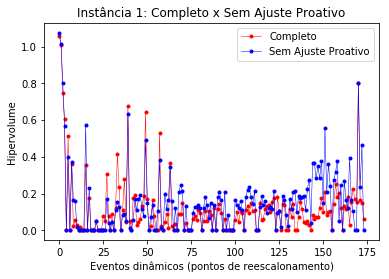

In [27]:
plt.title("Instância 1: Completo x Sem Ajuste Proativo")
plt.xlabel("Eventos dinâmicos (pontos de reescalonamento)")
plt.ylabel("Hipervolume")
plt.plot(comparison_datasets["ST10_DT10_E5_SK4-5"]["MS2MODynamic-complete"].event, comparison_datasets["ST10_DT10_E5_SK4-5"]["MS2MODynamic-complete"].hypervolume, "-ro", markersize=3, lw=.5, label="Completo")
plt.plot(comparison_datasets["ST10_DT10_E5_SK4-5"]["MS2MODynamic-norepair"].event, comparison_datasets["ST10_DT10_E5_SK4-5"]["MS2MODynamic-norepair"].hypervolume, "-bo", markersize=3, lw=.5, label="Sem Ajuste Proativo")
plt.legend()
plt.show()

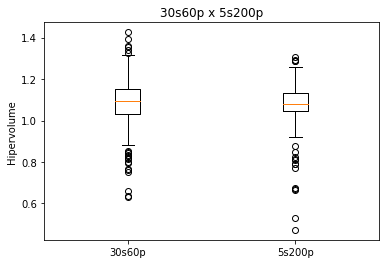

In [6]:
plt.title("30s60p x 5s200p")
# plt.xlabel("Eventos dinâmicos (pontos de reescalonamento)")
plt.ylabel("Hipervolume")
# plt.boxplot(comparison_datasets["ST30_DT10_E15_SK6-7"]["MS2MO-30s60p"].hypervolume, 0)
# plt.figure()
plt.boxplot([muitos.hypervolume, poucos.hypervolume], labels=["30s60p", "5s200p"])
# plt.legend()
plt.show()